<a href="https://colab.research.google.com/github/yejin0455/sesac-python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_KNN%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN 분류에 사용할 데이터 - 붓꽃 데이터

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data

In [2]:
data = iris_data['data']
data.shape  #150개 X (sepal-length, petal-width, petal-length, petal-width)

(150, 4)

In [3]:
target = iris_data['target']
target.shape  #150개 ([:50]=>0, [50:100]=>1, [100:]=>2)

(150,)

In [6]:
tname = iris_data['target_names']
tname  #0:setosa, 1:versicolor, 2:virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
for i, t in enumerate(target):
    print(f"{i}:{tname[t]}")

In [11]:
def distance(x1, x2):
    return sum((x1-x2)**2)**(1/2)

In [12]:
import numpy as np
na1 = np.array([1, 2])
na2 = np.array([5, 5])
print(distance(na1, na2))

5.0


In [13]:
def find_k_nearest_neighbor_c(xs, ys, tx, k=5):
    sarr = []
    for i, x in enumerate(xs):
        dis = distance(x, tx)
        sarr.append((dis, i))  #거리순으로 정렬한 이후에도 몇 번째 요소인지 기억하기 위해 (dis, i)를 보관
    sarr.sort(key = lambda x:x[0])
    nd = {}  #어떠한 클래스에 속하는지 분포를 파악해서 보관하기 위한 용도
    for x in sarr[:k]:  #k개의 가까운 이웃을 반복
        neighbor = ys[x[1]]  #x[0]:거리, x[1]:인덱스 이므로 원하는 값은 ys[x[1]]
        if neighbor in nd:
            nd[neighbor] += 1
        else:
            nd[neighbor] = 0
    return max(nd, key=nd.get)  #가장 많이 나온 클래스를 반환

In [14]:
def find_k_nearest_neighbors_c(xs, ys, t_xs, k=5):
    return np.array([find_k_nearest_neighbor_c(xs, ys, tx, k) for tx in t_xs])

In [15]:
data.shape, target.shape

((150, 4), (150,))

In [16]:
from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys = train_test_split(data, target)  #학습데이터와 테스트데이터로 분리
train_xs.shape, test_xs.shape, train_ys.shape, test_ys.shape

((112, 4), (38, 4), (112,), (38,))

In [17]:
pred_val = find_k_nearest_neighbors_c(train_xs, train_ys, test_xs)  #학습 후 예측하시오

In [18]:
print(f"예측 결과:{pred_val}")
print(f"실제 결과:{test_ys}")

예측 결과:[1 1 0 0 0 2 1 0 1 1 1 2 1 2 0 2 0 1 0 0 2 2 2 0 1 0 0 1 0 1 1 0 0 1 2 2 2
 0]
실제 결과:[1 1 0 0 0 2 1 0 1 2 1 2 1 2 0 2 0 1 0 0 2 2 2 0 1 0 0 1 0 1 2 0 0 1 2 2 2
 0]


In [19]:
import matplotlib.pyplot as plt

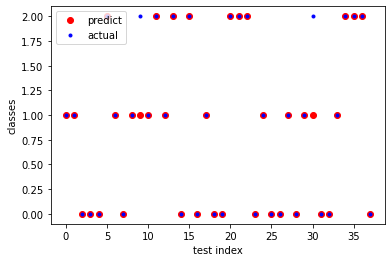

In [21]:
plt.plot(pred_val, 'ro', label='predict')
plt.plot(test_ys, 'b.', label='actual')
plt.xlabel("test index")
plt.ylabel("classes")
plt.legend()
plt.show()

In [24]:
def evaluate(actual_ys, predict_ys):
    correct_cnt = 0
    for i, y in enumerate(actual_ys):
        if predict_ys[i] == y:
            correct_cnt += 1
    return correct_cnt/len(actual_ys)

In [25]:
print(evaluate(test_ys, pred_val))

0.9473684210526315


ML 개체 사용(사이킷 런의 KNN 분류 모델)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier()  #모델 개체 생성
knc_model.fit(train_xs, train_ys)  #학습
pred_val2 = knc_model.predict(test_xs)  #예측하시오

In [27]:
print(f"예측 결과1:{pred_val}")
print(f"예측 결과2:{pred_val2}")
print(f"실제 결과:{test_ys}")

예측 결과1:[1 1 0 0 0 2 1 0 1 1 1 2 1 2 0 2 0 1 0 0 2 2 2 0 1 0 0 1 0 1 1 0 0 1 2 2 2
 0]
예측 결과2:[1 1 0 0 0 2 1 0 1 1 1 2 1 2 0 2 0 1 0 0 2 2 2 0 1 0 0 1 0 1 1 0 0 1 2 2 2
 0]
실제 결과:[1 1 0 0 0 2 1 0 1 2 1 2 1 2 0 2 0 1 0 0 2 2 2 0 1 0 0 1 0 1 2 0 0 1 2 2 2
 0]


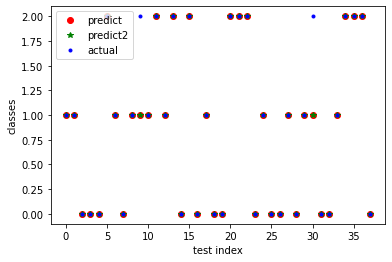

In [28]:
plt.plot(pred_val, 'ro', label='predict')
plt.plot(pred_val2, 'g*', label='predict2')
plt.plot(test_ys, 'b.', label='actual')
plt.xlabel("test index")
plt.ylabel("classes")
plt.legend()
plt.show()